In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
%matplotlib inline

In [2]:
directory = "/media/sony/0CA83E99A83E80EE/Chris/Bocconi/Thesis/Data_copy/Data/"

In [3]:
df = pd.read_csv(directory +'USeduc2011.csv', skiprows =4)

In [4]:
df.rename(columns ={'Industry recode for 2018 and later based on 2017 IND codes':'industry_name'}, inplace = True)

In [5]:
unwanted = ['N/A (less than 16 years old/NILF who last worked more than 5 years ago or never worked)','Unemployed And Last Worked 5 Years Ago Or Earlier Or Never Worked']

In [6]:
df.drop(df[df.industry_name.isin(unwanted)].index, inplace = True) 

In [7]:
df_concat = pd.DataFrame(columns = ['industry_name','hs_all','uni_all', 'year'])
for year in range(2008,2018):
    df= pd.read_csv(directory +'USeduc' + str(year)+ '.csv', skiprows =4)
    df.rename(columns ={'Industry recode for 2018 and later based on 2017 IND codes':'industry_name'}, inplace = True)
    df.drop(df[df.industry_name.isin(unwanted)].index, inplace = True)
    df.dropna(subset =['industry_name'], inplace = True)
    df.set_index('industry_name', inplace = True)
    df['hs_all'] = df.loc[:,'N/A (less than 3 years old)':'GED or alternative credential'].sum(axis =1)
    df['uni_all'] = df.loc[:, 'Some college, but less than 1 year':].sum(axis=1)
    df_edu = df[['hs_all','uni_all']]
    df_edu.reset_index(inplace = True)
    df_edu['year'] = year
    df_concat = pd.concat([df_concat, df_edu])
    

/home/sony/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [8]:
df_concat.head()

,industry_name,hs_all,uni_all,year
0,AGR-Crop Production,9924,15310,2008
1,AGR-Animal Production And Aquaculture,5974,9667,2008
2,AGR-Forestry Except Logging,240,862,2008
3,AGR-Logging,1225,1587,2008
4,"AGR-Fishing, Hunting And Trapping",468,812,2008


In [9]:
df_concat.tail()

,industry_name,hs_all,uni_all,year
245,MIL-U.S. Navy,71421,250323,2017
246,MIL-U.S. Marines,72477,149941,2017
247,MIL-U.S. Coast Guard,6235,35465,2017
248,"MIL-U.S. Armed Forces, Branch Not Specified",16433,62772,2017
249,MIL-Military Reserves Or National Guard,7148,24955,2017


In [10]:
industry_map = {'AGR-Crop Production':16, 'AGR-Animal Production And Aquaculture':16,
       'AGR-Forestry Except Logging': 16, 'AGR-Logging':16,
       'AGR-Fishing, Hunting And Trapping':16,
       'AGR-Support Activities For Agriculture And Forestry': 16,
       'EXT-Oil And Gas Extraction':2, 'EXT-Coal Mining':2,
       'EXT-Metal Ore Mining':2,
       'EXT-Nonmetallic Mineral Mining And Quarrying':2,
       'EXT-Support Activities For Mining':2,
       'UTL-Electric Power Generation, Transmission And Distribution':16,
       'UTL-Natural Gas Distribution':16,
       'UTL-Electric And Gas, And Other Combinations':16,
       'UTL-Water, Steam, Air Conditioning, And Irrigation Systems':16,
       'UTL-Sewage Treatment Facilities':16, 'UTL-Not Specified Utilities':16,
       'CON-Construction (The Cleaning Of Buildings And Dwellings Is Incidental During Construction And Immediately After Construction)': 16,
       'MFG-Animal Food, Grain And Oilseed Milling':4,
       'MFG-Sugar And Confectionery Products':4,
       'MFG-Fruit And Vegetable Preserving And Specialty Foods':4,
       'MFG-Dairy Products':4, 'MFG-Animal Slaughtering And Processing':4,
       'MFG-Retail Bakeries':4,
       'MFG-Bakeries And Tortilla, Except Retail Bakeries':4,
       'MFG-Seafood And Other Miscellaneous Foods, N.E.C.':4,
       'MFG-Not Specified Food Industries':4, 'MFG-Beverage':4, 'MFG-Tobacco':4,
       'MFG-Fiber, Yarn, And Thread Mills': 'dd',
       'MFG-Fabric Mills, Except Knitting Mills': 'dd',
       'MFG-Textile And Fabric Finishing And Fabric Coating Mills': 'dd',
       'MFG-Carpet And Rug Mills': 'dd',
       'MFG-Textile Product Mills, Except Carpet And Rug': 'dd',
       'MFG-Knitting Fabric Mills, And Apparel Knitting Mills': 'dd',
       'MFG-Footwear': 'dd',
       'MFG-Leather And Hide Tanning And Finishing, And Other Leather And Allied Products': 'dd',
       'MFG-Pulp, Paper, And Paperboard Mills': 'gg',
       'MFG-Paperboard Container': 'gg',
       'MFG-Miscellaneous Paper And Pulp Products': 'gg',
       'MFG-Printing And Related Support Activities': 'gg',
       'MFG-Petroleum Refining':'hh',
       'MFG-Miscellaneous Petroleum And Coal Products': 'hh',
       'MFG-Resin, Synthetic Rubber, And Fibers And Filaments':5,
       'MFG-Agricultural Chemicals':5, 'MFG-Pharmaceuticals And Medicines':5,
       'MFG-Paint, Coating, And Adhesives':5,
       'MFG-Soap, Cleaning Compound, And Cosmetics':5,
       'MFG-Industrial And Miscellaneous Chemicals':5,
       'MFG-Plastics Products':'aa', 'MFG-Tires':'aa',
       'MFG-Rubber Products, Except Tires':'aa',
       'MFG-Pottery, Ceramics, And Plumbing Fixture Manufacturing':'ii',
       'MFG-Clay Building Material And Refractories':'ii',
       'MFG-Glass And Glass Products':'ii',
       'MFG-Cement, Concrete, Lime, And Gypsum Products':'ii',
       'MFG-Miscellaneous Nonmetallic Mineral Products':'ii',
       'MFG-Iron And Steel Mills And Steel Products':6,
       'MFG-Aluminum Production And Processing':6,
       'MFG-Nonferrous Metal, Except Aluminum, Production And Processing':6,
       'MFG-Foundries':6, 'MFG-Metal Forgings And Stampings':6,
       'MFG-Cutlery And Hand Tools':6,
       'MFG-Structural Metals, And Boiler, Tank, And Shipping Containers':6,
       'MFG-Machine Shops; Turned Products; Screws, Nuts And Bolts':6,
       'MFG-Coating, Engraving, Heat Treating And Allied Activities':6,
       'MFG-Ordnance':6, 'MFG-Miscellaneous Fabricated Metal Products':6,
       'MFG-Not Specified Metal Industries':6,
       'MFG-Agricultural Implements':7,
       'MFG-Construction, And Mining And Oil And Gas Field Machinery':7,
       'MFG-Commercial And Service Industry Machinery':7,
       'MFG-Metalworking Machinery':7,
       'MFG-Engine, Turbine, And Power Transmission Equipment':7,
       'MFG-Computer And Peripheral Equipment':8,
       'MFG-Communications, And Audio And Video Equipment':8,
       'MFG-Navigational, Measuring, Electromedical, And Control Instruments':8,
       'MFG-Electronic Components And Products, N.E.C.':8,
       'MFG-Household Appliances':9,
       'MFG-Electric Lighting And Electrical Equipment Manufacturing, And Other Electrical Component Manufacturing, N.E.C.':9,
       'MFG-Motor Vehicles And Motor Vehicle Equipment':10,
       'MFG-Aircraft And Parts':10, 'MFG-Aerospace Products And Parts':10,
       'MFG-Railroad Rolling Stock':10, 'MFG-Ship And Boat Building':10,
       'MFG-Other Transportation Equipment':10,
       'MFG-Sawmills And Wood Preservation':'jj',
       'MFG-Veneer, Plywood, And Engineered Wood Products':'jj',
       'MFG-Prefabricated Wood Buildings And Mobile Homes':'jj',
       'MFG-Miscellaneous Wood Products':'jj',
       'MFG-Furniture And Related Products':'jj',
       'MFG-Medical Equipment And Supplies':'jj',
       'MFG-Sporting And Athletic Goods, And Doll, Toy, And Game Manufacturing':'kk',
       'MFG-Miscellaneous Manufacturing, N.E.C.':'ll',
       'MFG-Not Specified Manufacturing Industries':'ll',
       'WHL-Motor Vehicle And Motor Vehicle Parts And Supplies Merchant Wholesalers':11,
       'WHL-Furniture And Home Furnishing Merchant Wholesalers':11,
       'WHL-Lumber And Other Construction Materials Merchant Wholesalers':11,
       'WHL-Professional And Commercial Equipment And Supplies Merchant Wholesalers':11,
       'WHL-Metals And Minerals, Except Petroleum, Merchant Wholesalers':11,
       'WHL-Household Appliances And Electrical And Electronic Goods Merchant Wholesalers':11,
       'WHL-Hardware, And Plumbing And Heating Equipment, And Supplies Merchant Wholesalers':11,
       'WHL-Machinery, Equipment, And Supplies Merchant Wholesalers':11,
       'WHL-Recyclable Material Merchant Wholesalers':11,
       'WHL-Miscellaneous Durable Goods Merchant Wholesalers':11,
       'WHL-Paper And Paper Products Merchant Wholesalers':11,
       'WHL-Drugs, Sundries, And Chemical And Allied Products Merchant Wholesalers':11,
       'WHL-Apparel, Piece Goods, And Notions Merchant Wholesalers':11,
       'WHL-Grocery And Related Product Merchant Wholesalers':11,
       'WHL-Farm Product Raw Material Merchant Wholesalers':11,
       'WHL-Petroleum And Petroleum Products Merchant Wholesalers':11,
       'WHL-Alcoholic Beverages Merchant Wholesalers':11,
       'WHL-Farm Supplies Merchant Wholesalers':11,
       'WHL-Miscellaneous Nondurable Goods Merchant Wholesalers':11,
       'WHL-Wholesale Electronic Markets And Agents And Brokers' :11,
       'WHL-Not Specified Wholesale Trade':11, 'RET-Automobile Dealers':12,
       'RET-Other Motor Vehicle Dealers':12,
       'RET-Automotive Parts, Accessories, And Tire Stores':12,
       'RET-Furniture And Home Furnishings Stores':12,
       'RET-Household Appliance Stores':12, 'RET-Electronics Stores':12,
       'RET-Building Material And Supplies Dealers':12,
       'RET-Hardware Stores':12,
       'RET-Lawn And Garden Equipment And Supplies Stores':12,
       'RET-Specialty Food Stores':12, 'RET-Beer, Wine, And Liquor Stores':12,
       'RET-Pharmacies And Drug Stores':12,
       'RET-Health And Personal Care, Except Drug, Stores':12,
       'RET-Gasoline Stations':12, 'RET-Clothing Stores':12, 'RET-Shoe Stores':12,
       'RET-Jewelry, Luggage, And Leather Goods Stores':12,
       'RET-Sporting Goods, And Hobby And Toy Stores':12,
       'RET-Sewing, Needlework, And Piece Goods Stores':12,
       'RET-Musical Instrument And Supplies Stores':12,
       'RET-Book Stores And News Dealers':12, 'RET-Florists':12,
       'RET-Office Supplies And Stationery Stores':12,
       'RET-Used Merchandise Stores':12,
       'RET-Gift, Novelty, And Souvenir Shops':12,
       'RET-Miscellaneous Retail Stores':12, 'RET-Vending Machine Operators':12,
       'RET-Fuel Dealers':12, 'RET-Other Direct Selling Establishments':12,
       'RET-Not Specified Retail Trade':12, 'TRN-Air Transportation':12,
       'TRN-Rail Transportation':16, 'TRN-Water Transportation':16,
       'TRN-Truck Transportation':16, 'TRN-Bus Service And Urban Transit':16,
       'TRN-Taxi And Limousine Service':16, 'TRN-Pipeline Transportation':16,
       'TRN-Scenic And Sightseeing Transportation':16,
       'TRN-Services Incidental To Transportation':16, 'TRN-Postal Service':16,
       'TRN-Couriers And Messengers':16, 'TRN-Warehousing And Storage':16,
       'INF-Newspaper Publishers':13,
       'INF-Periodical, Book, And Directory Publishers':13,
       'INF-Software Publishers':13,
       'INF-Motion Picture And Video Industries':13,
       'INF-Sound Recording Industries':13,
       'INF-Broadcasting, Except Internet':13,
       'INF-Internet Publishing And Broadcasting And Web Search Portals':13,
       'INF-Wired Telecommunications Carriers':13,
       'INF-Telecommunications, Except Wired Telecommunications Carriers':13,
       'INF-Data Processing, Hosting, And Related Services':13,
       'INF-Libraries And Archives':13,
       'INF-Other Information Services, Except Libraries And Archives, And Internet Publishing And Broadcasting And Web Search Portals':13,
       'FIN-Banking And Related Activities': 14,
       'FIN-Savings Institutions, Including Credit Unions': 14,
       'FIN-Nondepository Credit And Related Activities': 14,
       'FIN-Securities, Commodities, Funds, Trusts, And Other Financial Investments': 14,
       'FIN-Automotive Equipment Rental And Leasing': 14,
       'FIN-Commercial, Industrial, And Other Intangible Assets Rental And Leasing': 14,
       'PRF-Legal Services':15,
       'PRF-Accounting, Tax Preparation, Bookkeeping, And Payroll Services':15,
       'PRF-Architectural, Engineering, And Related Services':15,
       'PRF-Specialized Design Services':15,
       'PRF-Computer Systems Design And Related Services':15,
       'PRF-Management, Scientific, And Technical Consulting Services':15,
       'PRF-Scientific Research And Development Services':15,
       'PRF-Advertising, Public Relations, And Related Services':15,
       'PRF-Veterinary Services':15,
       'PRF-Other Professional, Scientific, And Technical Services':15,
       'PRF-Management Of Companies And Enterprises':15,
       'PRF-Employment Services':15, 'PRF-Business Support Services':15,
       'PRF-Travel Arrangements And Reservation Services':15,
       'PRF-Investigation And Security Services':15,
       'PRF-Services To Buildings And Dwellings (Except Cleaning During Construction And Immediately After Construction)':15,
       'PRF-Landscaping Services':15,
       'PRF-Other Administrative And Other Support Services':15,
       'PRF-Waste Management And Remediation Services':15,
       'EDU-Elementary And Secondary Schools':16,
       'EDU-Colleges, Universities, And Professional Schools, Including Junior Colleges':16,
       'EDU-Business, Technical, And Trade Schools And Training':16,
       'EDU-Other Schools And Instruction, And Educational Support Services':16,
       'MED-Offices Of Physicians':16, 'MED-Offices Of Dentists':16,
       'MED-Offices Of Chiropractors':16, 'MED-Offices Of Optometrists':16,
       'MED-Offices Of Other Health Practitioners':16,
       'MED-Outpatient Care Centers':16, 'MED-Home Health Care Services':16,
       'MED-Other Health Care Services':16,
       'MED-Nursing Care Facilities (Skilled Nursing Facilities)':16,
       'MED-Residential Care Facilities, Except Skilled Nursing Facilities':16,
       'SCA-Individual And Family Services':16,
       'SCA-Community Food And Housing, And Emergency Services':16,
       'SCA-Vocational Rehabilitation Services':16,
       'SCA-Child Day Care Services':16,
       'ENT-Museums, Art Galleries, Historical Sites, And Similar Institutions':16,
       'ENT-Bowling Centers':16,
       'ENT-Other Amusement, Gambling, And Recreation Industries':16,
       'ENT-Traveler Accommodation':16,
       "ENT-Recreational Vehicle Parks And Camps, And Rooming And Boarding Houses, Dormitories, And Workers' Camps":16,
       'ENT-Restaurants And Other Food Services':16,
       'ENT-Drinking Places, Alcoholic Beverages':16,
       'SRV-Automotive Repair And Maintenance':16, 'SRV-Car Washes':16,
       'SRV-Electronic And Precision Equipment Repair And Maintenance':16,
       'SRV-Commercial And Industrial Machinery And Equipment Repair And Maintenance':16,
       'SRV-Barber Shops':16, 'SRV-Beauty Salons':16,
       'SRV-Nail Salons And Other Personal Care Services':16,
       'SRV-Drycleaning And Laundry Services':16,
       'SRV-Funeral Homes, Cemeteries And Crematories':16,
       'SRV-Other Personal Services':16, 'SRV-Religious Organizations':16,
       'SRV-Civic, Social, Advocacy Organizations, And Grantmaking And Giving Services':16,
       'SRV-Labor Unions':16,
       'SRV-Business, Professional, Political, And Similar Organizations':15,
       'SRV-Private Households':'mm',
       'ADM-Executive Offices And Legislative Bodies':15,
       'ADM-Public Finance Activities':15,
       'ADM-Other General Government And Support':15,
       'ADM-Justice, Public Order, And Safety Activities':15,
       'ADM-Administration Of Human Resource Programs':15,
       'ADM-Administration Of Environmental Quality And Housing Programs':15,
       'ADM-Administration Of Economic Programs And Space Research':15,
       'ADM-National Security And International Affairs':15, 'MIL-U.S. Army':'nn',
       'MIL-U.S. Air Force':'nn', 'MIL-U.S. Navy':'nn', 'MIL-U.S. Marines':'nn',
       'MIL-U.S. Coast Guard':'nn',
       'MIL-U.S. Armed Forces, Branch Not Specified':'nn',
       'MIL-Military Reserves Or National Guard':'nn',
       'Unemployed And Last Worked 5 Years Ago Or Earlier Or Never Worked': np.nan}

In [11]:
df_edu = df_concat.copy()

In [12]:
df_edu['industry'] = df_edu.industry_name.map(industry_map)

In [13]:
df_edu.head()

,industry_name,hs_all,uni_all,year,industry
0,AGR-Crop Production,9924,15310,2008,16
1,AGR-Animal Production And Aquaculture,5974,9667,2008,16
2,AGR-Forestry Except Logging,240,862,2008,16
3,AGR-Logging,1225,1587,2008,16
4,"AGR-Fishing, Hunting And Trapping",468,812,2008,16


In [14]:
df_main = pd.read_csv(directory + 'affiliates_dataV2.csv')

In [15]:
df_indu_skill = df_edu.groupby(['industry','year'])[['hs_all','uni_all']].sum().reset_index()

In [16]:
df_indu_skill['skill_intens'] = df_indu_skill.uni_all / df_indu_skill.hs_all

In [17]:
df_indu_skill.head()

,industry,year,hs_all,uni_all,skill_intens
0,2,2008,4907,9238,1.882617
1,2,2009,4797,9099,1.896811
2,2,2010,4884,9089,1.860975
3,2,2011,5367,9892,1.843115
4,2,2012,5520,10633,1.926268


In [18]:
df_indu_skill.tail()

,industry,year,hs_all,uni_all,skill_intens
235,nn,2013,3362,12040,3.581202
236,nn,2014,3367,12116,3.598456
237,nn,2015,3430,12093,3.525656
238,nn,2016,3397,12100,3.561966
239,nn,2017,316221,1166467,3.688771


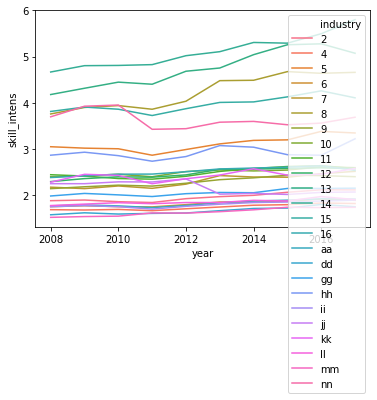

In [19]:
sns.lineplot(x = 'year', y = 'skill_intens', hue = 'industry', data = df_indu_skill)

In [20]:
df_indu_skill.drop(['hs_all', 'uni_all'], axis =1, inplace = True)

In [21]:
df_main.head()

,home_code,host_code,year,industry,distance,scoreproced,minorinvest,enfcontract,paytax,minorinvest_lag,...,border,aff_sales,aff_ex,aff_im,aff_parex,aff_parim,fdi_flow,fdi_position,indus_ex,indus_im
0,USA,ABW,2000,1,3147.434733,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,271792324.0,1.535549e+09
1,USA,ABW,2000,2,3147.434733,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71186832.0,1.461237e+09
2,USA,ABW,2000,3,3147.434733,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200605492.0,7.431215e+07
3,USA,ABW,2000,4,3147.434733,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30969497.0,1.302712e+06
4,USA,ABW,2000,5,3147.434733,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23017107.0,3.524300e+04


In [22]:
df_main = pd.merge(df_main, df_indu_skill, how = 'left', on =['industry', 'year'])

In [23]:
df_edu.head()

,industry_name,hs_all,uni_all,year,industry
0,AGR-Crop Production,9924,15310,2008,16
1,AGR-Animal Production And Aquaculture,5974,9667,2008,16
2,AGR-Forestry Except Logging,240,862,2008,16
3,AGR-Logging,1225,1587,2008,16
4,"AGR-Fishing, Hunting And Trapping",468,812,2008,16


In [24]:
df_edu['indus_prefix'] = df_edu.industry_name.apply(lambda x: x.split('-')[0])

In [25]:
by_prefix = df_edu.groupby(['year', 'indus_prefix'])['hs_all', 'uni_all'].sum().reset_index()

In [26]:
man_skill_df = by_prefix[by_prefix.indus_prefix == 'MFG'][['year', 'hs_all', 'uni_all']]

In [27]:
man_skill_df['skill_intens'] = man_skill_df.uni_all / man_skill_df.hs_all

In [28]:
man_skill_df['industry'] = 3

In [29]:
man_skill_df.drop(['hs_all','uni_all'], axis =1, inplace = True)

In [30]:
man_skill_df.head()

,year,skill_intens,industry
9,2008,2.093824,3
27,2009,2.115857,3
45,2010,2.116260,3
63,2011,2.069762,3
81,2012,2.135577,3


In [31]:
df_main = pd.merge(df_main, man_skill_df, how ='left', on =['year', 'industry'])

In [32]:
df_main.head()

,home_code,host_code,year,industry,distance,scoreproced,minorinvest,enfcontract,paytax,minorinvest_lag,...,aff_ex,aff_im,aff_parex,aff_parim,fdi_flow,fdi_position,indus_ex,indus_im,skill_intens_x,skill_intens_y
0,USA,ABW,2000,1,3147.434733,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,271792324.0,1.535549e+09,NaN,NaN
1,USA,ABW,2000,2,3147.434733,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,71186832.0,1.461237e+09,NaN,NaN
2,USA,ABW,2000,3,3147.434733,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,200605492.0,7.431215e+07,NaN,NaN
3,USA,ABW,2000,4,3147.434733,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,30969497.0,1.302712e+06,NaN,NaN
4,USA,ABW,2000,5,3147.434733,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23017107.0,3.524300e+04,NaN,NaN


In [33]:
df_total_edu = df_concat.copy()

In [34]:
df_total_edu  = df_total_edu.groupby(['year'])['hs_all', 'uni_all'].sum().reset_index()

In [35]:
df_total_edu.head()

,year,hs_all,uni_all
0,2008,591395,1522885
1,2009,581994,1524230
2,2010,577137,1524509
3,2011,585893,1531899
4,2012,570693,1532860


In [36]:
df_total_edu['skill_intens_total'] = df_total_edu.uni_all / df_total_edu.hs_all

In [37]:
df_total_edu.drop(['hs_all', 'uni_all'], inplace = True, axis =1)

In [38]:
df_total_edu['industry'] = 1

In [39]:
df_main = pd.merge(df_main, df_total_edu, how = 'left', on =['year', 'industry'])

In [40]:
df_main.head()

,home_code,host_code,year,industry,distance,scoreproced,minorinvest,enfcontract,paytax,minorinvest_lag,...,aff_im,aff_parex,aff_parim,fdi_flow,fdi_position,indus_ex,indus_im,skill_intens_x,skill_intens_y,skill_intens_total
0,USA,ABW,2000,1,3147.434733,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,271792324.0,1.535549e+09,NaN,NaN,NaN
1,USA,ABW,2000,2,3147.434733,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,71186832.0,1.461237e+09,NaN,NaN,NaN
2,USA,ABW,2000,3,3147.434733,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,200605492.0,7.431215e+07,NaN,NaN,NaN
3,USA,ABW,2000,4,3147.434733,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,30969497.0,1.302712e+06,NaN,NaN,NaN
4,USA,ABW,2000,5,3147.434733,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,23017107.0,3.524300e+04,NaN,NaN,NaN


In [41]:
def merge_cols(x):
    if not np.isnan(x[0]):
        return x[0]
    elif not np.isnan(x[1]):
        return x[1]
    else:
        return x[2]

In [42]:
df_main.columns

Index(['home_code', 'host_code', 'year', 'industry', 'distance', 'scoreproced',
       'minorinvest', 'enfcontract', 'paytax', 'minorinvest_lag',
       'uncertainty', 'home_gdp', 'host_gdp', 'couprisk', 'couprisk_lag',
       'tariff_avg', 'tariff_w_avg', 'uncertainty_lag', 'home_gdp_capita',
       'host_gdp_capita', 'partner_directed', 'OECD_partner', 'home_north',
       'host_north', 'north-north', 'north-south', 'south-north',
       'south-south', 'host_lock', 'lang', 'NAFTA', 'migration',
       'fiscal_score', 'invest_score', 'judic_score', 'integrity_score',
       'monthly_precip', 'yearly_precip', 'precip_volatility', 'road_home',
       'road_host', 'home_polcon', 'host_polcon', 'border', 'aff_sales',
       'aff_ex', 'aff_im', 'aff_parex', 'aff_parim', 'fdi_flow',
       'fdi_position', 'indus_ex', 'indus_im', 'skill_intens_x',
       'skill_intens_y', 'skill_intens_total'],
      dtype='object')

In [43]:
df_main['skill_intens'] = df_main[['skill_intens_x',
       'skill_intens_y', 'skill_intens_total']].apply(merge_cols, axis =1)

In [44]:
df_main[df_main.skill_intens.notna()]

,home_code,host_code,year,industry,distance,scoreproced,minorinvest,enfcontract,paytax,minorinvest_lag,...,aff_parex,aff_parim,fdi_flow,fdi_position,indus_ex,indus_im,skill_intens_x,skill_intens_y,skill_intens_total,skill_intens
160,USA,ABW,2008,1,3147.434733,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,628942579.0,3.259698e+09,NaN,NaN,2.575072,2.575072
161,USA,ABW,2008,2,3147.434733,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,332740401.0,3.239884e+09,1.882617,NaN,NaN,1.882617
162,USA,ABW,2008,3,3147.434733,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,296202178.0,1.981385e+07,NaN,2.093824,NaN,2.093824
163,USA,ABW,2008,4,3147.434733,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,52016527.0,1.513560e+05,1.688288,NaN,NaN,1.688288
164,USA,ABW,2008,5,3147.434733,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,37336276.0,3.282520e+05,3.050417,NaN,NaN,3.050417
165,USA,ABW,2008,6,3147.434733,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,22744100.0,3.230340e+05,1.752722,NaN,NaN,1.752722
166,USA,ABW,2008,7,3147.434733,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.174779,NaN,NaN,2.174779
167,USA,ABW,2008,8,3147.434733,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.759634,NaN,NaN,3.759634
168,USA,ABW,2008,9,3147.434733,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,73354655.0,5.123850e+05,2.143314,NaN,NaN,2.143314
169,USA,ABW,2008,10,3147.434733,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,17113413.0,5.355000e+04,2.400738,NaN,NaN,2.400738


In [45]:
df_main.drop(['skill_intens_x',
       'skill_intens_y', 'skill_intens_total'], axis =1 , inplace = True)

In [46]:
df_main.head()

,home_code,host_code,year,industry,distance,scoreproced,minorinvest,enfcontract,paytax,minorinvest_lag,...,aff_sales,aff_ex,aff_im,aff_parex,aff_parim,fdi_flow,fdi_position,indus_ex,indus_im,skill_intens
0,USA,ABW,2000,1,3147.434733,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,271792324.0,1.535549e+09,NaN
1,USA,ABW,2000,2,3147.434733,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71186832.0,1.461237e+09,NaN
2,USA,ABW,2000,3,3147.434733,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200605492.0,7.431215e+07,NaN
3,USA,ABW,2000,4,3147.434733,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30969497.0,1.302712e+06,NaN
4,USA,ABW,2000,5,3147.434733,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23017107.0,3.524300e+04,NaN


In [47]:
df_main.to_csv(directory + 'affiliates_dataV3.csv', index = False)

In [48]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77900 entries, 0 to 77899
Data columns (total 54 columns):
home_code            77900 non-null object
host_code            77900 non-null object
year                 77900 non-null int64
industry             77900 non-null object
distance             75620 non-null float64
scoreproced          41980 non-null float64
minorinvest          41980 non-null float64
enfcontract          47720 non-null float64
paytax               41980 non-null float64
minorinvest_lag      38400 non-null float64
uncertainty          32200 non-null float64
home_gdp             73800 non-null float64
host_gdp             67720 non-null float64
couprisk             61200 non-null float64
couprisk_lag         61160 non-null float64
tariff_avg           50900 non-null float64
tariff_w_avg         50900 non-null float64
uncertainty_lag      29900 non-null float64
home_gdp_capita      73800 non-null float64
host_gdp_capita      67720 non-null float64
partner_directed